## What This Notebook Shows

This notebook demonstrates how normalized administrative pressure
indicators can be explored to identify:
- Temporal deviations within districts
- System-wide stress patterns
- Districts requiring administrative attention

The analysis is exploratory and does not infer causality.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df = pd.read_csv("../data/processed/composite_pressure_index.csv")
district_stats = pd.read_csv("../data/processed/district_risk_typology.csv")

combined_df["month"] = pd.to_datetime(combined_df["month"])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [3]:
bio_idx  = pd.read_csv("../data/processed/biometric_pressure_index.csv")
demo_idx = pd.read_csv("../data/processed/demographic_pressure_index.csv")

bio_idx.shape, demo_idx.shape

((11559, 4), (11711, 4))

Before analysis, we verify that the datasets contain:
- State and district identifiers
- Monthly time dimension
- Normalised pressure indices

In [4]:
bio_idx["month"]  = pd.to_datetime(bio_idx["month"])
demo_idx["month"] = pd.to_datetime(demo_idx["month"])

## System-Level Administrative Pressure

This chart shows how administrative pressure evolves
at the national level, averaged across districts.

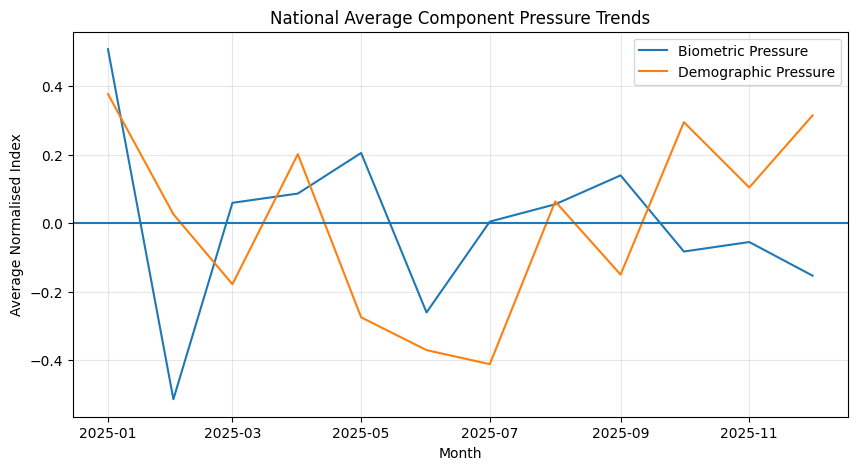

In [37]:
# National averages for component pressures
national_bio = (
    bio_idx
    .groupby("month")["biometric_pressure_index"]
    .mean()
    .reset_index()
)

national_demo = (
    demo_idx
    .groupby("month")["demographic_pressure_index"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))

plt.plot(
    national_bio["month"],
    national_bio["biometric_pressure_index"],
    label="Biometric Pressure"
)

plt.plot(
    national_demo["month"],
    national_demo["demographic_pressure_index"],
    label="Demographic Pressure"
)

plt.axhline(0)
plt.title("National Average Component Pressure Trends")
plt.xlabel("Month")
plt.ylabel("Average Normalised Index")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This chart decomposes the composite administrative pressure
into its biometric and demographic components, providing
context on the nature of administrative load over time.

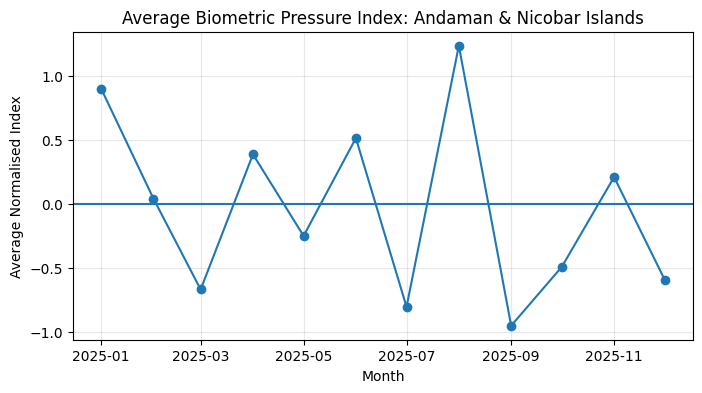

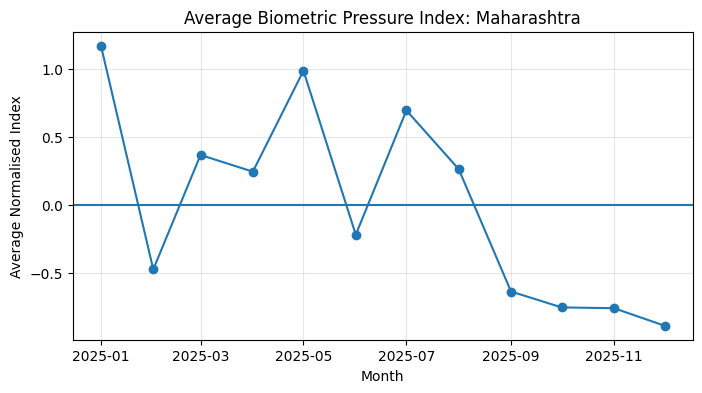

In [49]:
# State-month averages for component pressures
bio_state_month = (
    bio_idx
    .groupby(["state", "month"])["biometric_pressure_index"]
    .mean()
    .reset_index()
)
example_states = [
    "Andaman & Nicobar Islands",  # small / UT
    "Maharashtra"                 # large / complex
]
for state in example_states:
    state_df = bio_state_month[bio_state_month["state"] == state]

    plt.figure(figsize=(8, 4))
    plt.plot(
        state_df["month"],
        state_df["biometric_pressure_index"],
        marker="o"
    )
    plt.axhline(0)
    plt.title(f"Average Biometric Pressure Index: {state}")
    plt.xlabel("Month")
    plt.ylabel("Average Normalised Index")
    plt.grid(alpha=0.3)
    plt.show()

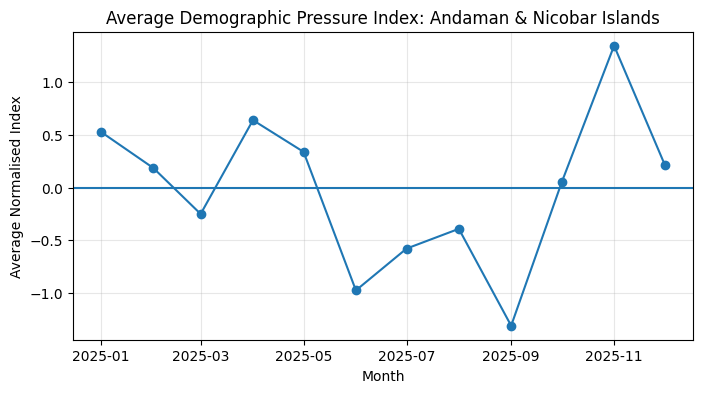

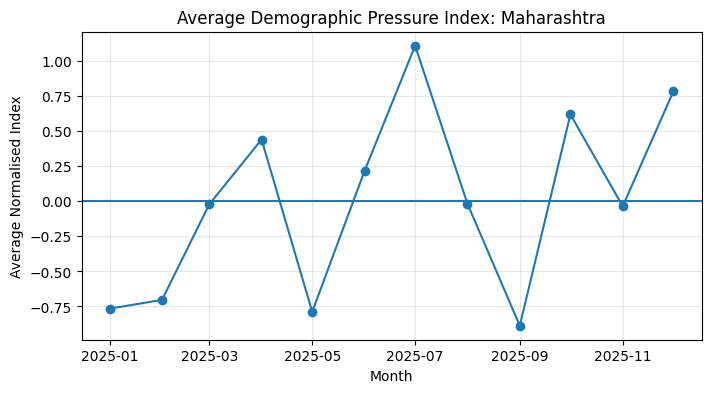

In [50]:
demo_state_month = (
    demo_idx
    .groupby(["state", "month"])["demographic_pressure_index"]
    .mean()
    .reset_index()
)
for state in example_states:
    state_df = demo_state_month[demo_state_month["state"] == state]

    plt.figure(figsize=(8, 4))
    plt.plot(
        state_df["month"],
        state_df["demographic_pressure_index"],
        marker="o"
    )
    plt.axhline(0)
    plt.title(f"Average Demographic Pressure Index: {state}")
    plt.xlabel("Month")
    plt.ylabel("Average Normalised Index")
    plt.grid(alpha=0.3)
    plt.show()

The figure shows how pressure indicators vary over time within a district.

Key observations:
- Values oscillate around a district-specific baseline
- Positive spikes represent periods of elevated update pressure
- Patterns differ across update types

These patterns warrant contextual interpretation rather than direct attribution.

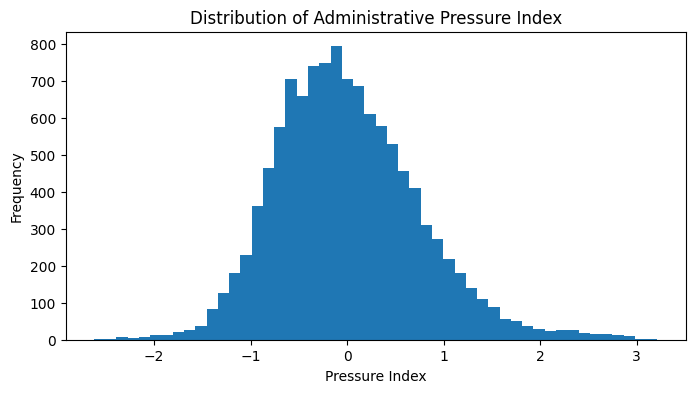

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(
    combined_df["composite_pressure_index"],
    bins=50
)
plt.title("Distribution of Administrative Pressure Index")
plt.xlabel("Pressure Index")
plt.ylabel("Frequency")
plt.show()

The distribution highlights:
- Most district-months cluster near zero
- A smaller subset shows higher-than-usual pressure
- Extreme values are relatively rare

This supports the use of indices as screening tools rather than definitive metrics.

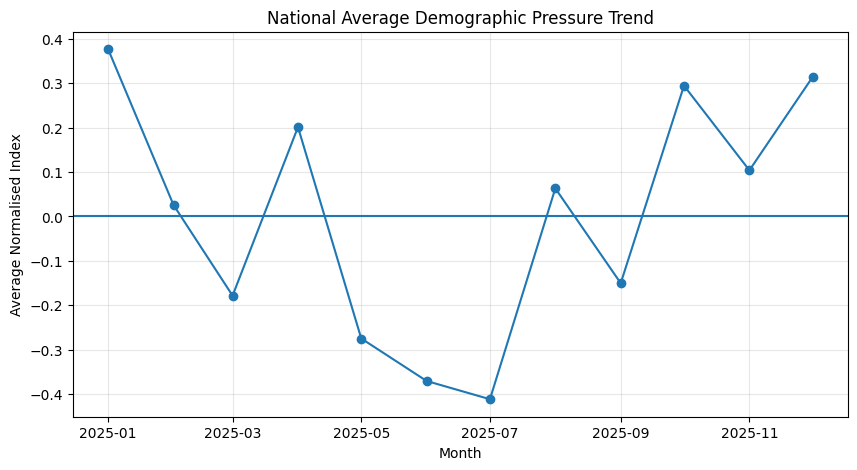

In [ ]:
national_demo_trend = (
    demo_idx
    .groupby("month")["demographic_pressure_index"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.plot(
    national_demo_trend["month"],
    national_demo_trend["demographic_pressure_index"],
    marker="o"
)
plt.axhline(0)
plt.title("National Average Demographic Pressure Trend")
plt.xlabel("Month")
plt.ylabel("Average Normalised Index")
plt.grid(alpha=0.3)
plt.show()

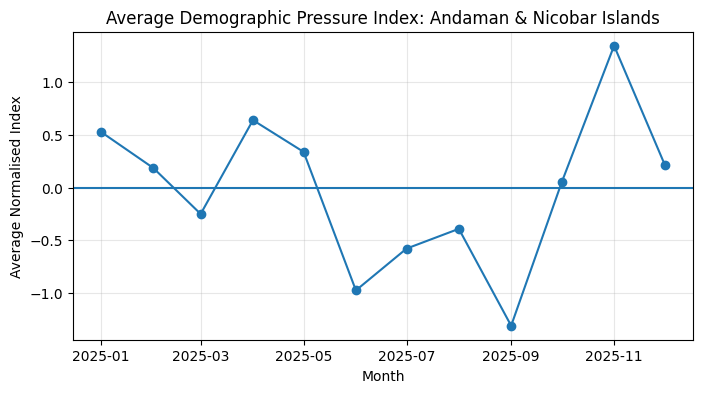

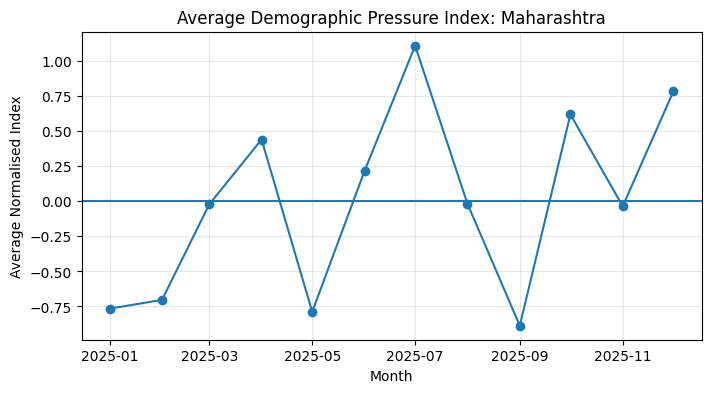

In [ ]:
example_states = ["Andaman & Nicobar Islands", "Maharashtra"]
for state in example_states:
    state_df = state_month[state_month["state"] == state]

    plt.figure(figsize=(8, 4))
    plt.plot(
        state_df["month"],
        state_df["demographic_pressure_index"],
        marker="o"
    )
    plt.axhline(0)
    plt.title(f"Average Demographic Pressure Index: {state}")
    plt.xlabel("Month")
    plt.ylabel("Average Normalised Index")
    plt.grid(alpha=0.3)
    plt.show()

State-level aggregation smooths district-level volatility and highlights
broader temporal patterns.

Such views may assist:
- Monitoring administrative load
- Identifying periods of systemic stress
- Prioritising regions for deeper qualitative assessment

### Limitations

- Indicators are relative and not absolute measures
- They do not capture direction or duration of movement
- They reflect administrative activity, not social outcomes
- Interpretation requires domain context and triangulation

These visuals are intended to support exploratory analysis only.

The normalised indicators and visual patterns presented here
form the basis of the interactive dashboard.

The dashboard allows users to explore these patterns
across states, districts, and time ranges.

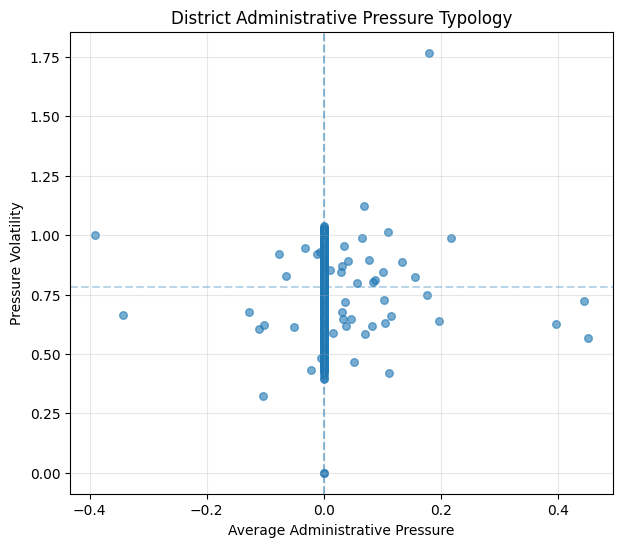

In [ ]:
plt.figure(figsize=(7, 6))

plt.scatter(
    risk_df["mean_pressure"],
    risk_df["volatility"],
    alpha=0.6,
    s=30
)

plt.axvline(0, linestyle="--", alpha=0.5)
plt.axhline(
    risk_df["volatility"].median(),
    linestyle="--",
    alpha=0.3
)

plt.xlabel("Average Administrative Pressure")
plt.ylabel("Pressure Volatility")
plt.title("District Administrative Pressure Typology")
plt.grid(alpha=0.3)
plt.show()

Each point represents a district summarised across time.
Districts in the upper-right quadrant exhibit both elevated
and volatile administrative pressure and may warrant closer
administrative review.

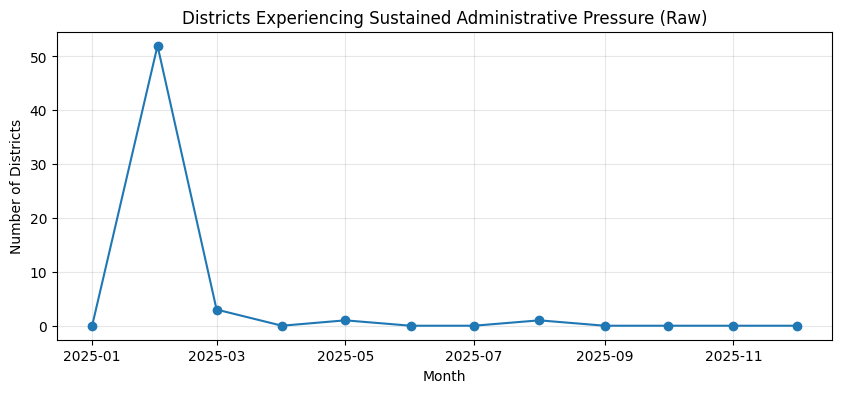

In [ ]:
combined_df = pd.read_csv("../data/processed/composite_pressure_index.csv")
combined_df["month"] = pd.to_datetime(combined_df["month"])
alert_counts = (
    combined_df
    .groupby("month")["alert_flag"]
    .sum()
    .reset_index(name="districts_in_alert")
)

plt.figure(figsize=(10, 4))

plt.plot(
    alert_counts["month"],
    alert_counts["districts_in_alert"],
    marker="o"
)

plt.title("Districts Experiencing Sustained Administrative Pressure (Raw)")
plt.xlabel("Month")
plt.ylabel("Number of Districts")
plt.grid(alpha=0.3)
plt.show()

## Districts Under Sustained Administrative Pressure (Unfiltered)

This chart shows the raw count of districts exceeding the
sustained pressure threshold in each month.

This chart reflects the number of districts exceeding
a sustained administrative pressure threshold in each month.
It does not represent population movement or volume of activity.

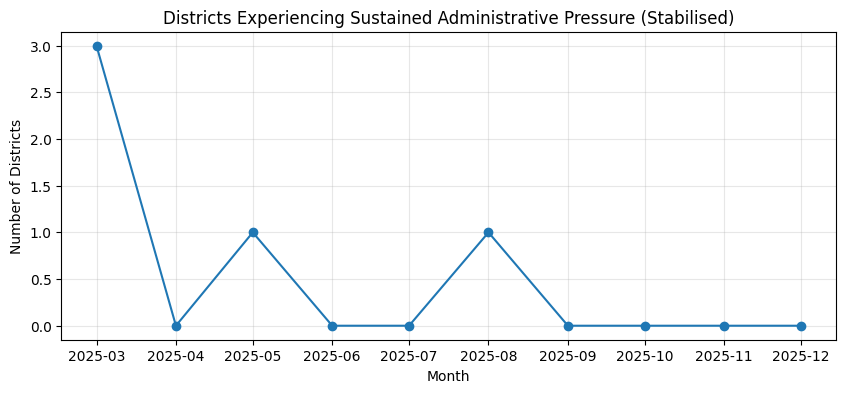

In [ ]:
min_valid_month = alert_counts["month"].min() + pd.DateOffset(months=2)

alert_counts_filtered = alert_counts[
    alert_counts["month"] >= min_valid_month
]
plt.figure(figsize=(10, 4))

plt.plot(
    alert_counts_filtered["month"],
    alert_counts_filtered["districts_in_alert"],
    marker="o"
)

plt.title("Districts Experiencing Sustained Administrative Pressure (Stabilised)")
plt.xlabel("Month")
plt.ylabel("Number of Districts")
plt.grid(alpha=0.3)
plt.show()

## Districts Under Sustained Administrative Pressure (Stabilised)

The initial months are excluded to account for rolling-window
stabilisation effects.

In [ ]:
combined_df["alert_flag"].value_counts()

alert_flag
False    11355
True        57
Name: count, dtype: int64

In [ ]:
district_stats = pd.read_csv("../data/processed/district_risk_typology.csv")
priority_districts = district_stats[
    district_stats["risk_category"].isin(["Sustained Stress", "Shock-Prone"])
].sort_values("volatility", ascending=False)

priority_districts.head(10)


,state,district,mean_pressure,volatility,risk_category
704,Rajasthan,Beawar,1.796655e-01,1.767636,Shock-Prone
830,Telangana,Warangal (Urban),6.793653e-02,1.124355,Shock-Prone
751,Tamil Nadu,Ariyalur,1.607510e-16,1.038719,Shock-Prone
777,Tamil Nadu,Thanjavur,7.170190e-17,1.035871,Shock-Prone
775,Tamil Nadu,Sivaganga,3.515706e-16,1.024904,Shock-Prone
757,Tamil Nadu,Dindigul,5.921189e-16,1.020598,Shock-Prone
782,Tamil Nadu,Thoothukkudi,2.590520e-16,1.016017,Shock-Prone
901,Uttar Pradesh,Mahrajganj,1.104856e-01,1.014270,Shock-Prone
760,Tamil Nadu,Kancheepuram,7.401487e-17,1.004919,Shock-Prone
783,Tamil Nadu,Tiruchirappalli,2.590520e-16,1.003230,Shock-Prone


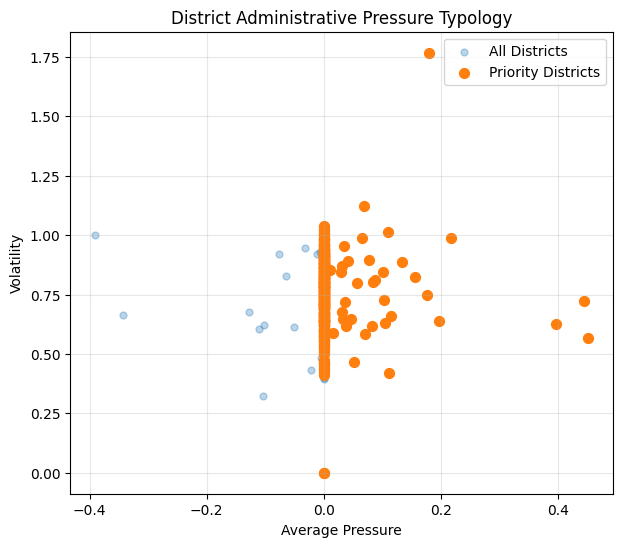

In [ ]:
plt.figure(figsize=(7, 6))

plt.scatter(
    district_stats["mean_pressure"],
    district_stats["volatility"],
    alpha=0.3,
    s=25,
    label="All Districts"
)

priority = district_stats[
    district_stats["risk_category"].isin(["Sustained Stress", "Shock-Prone"])
]

plt.scatter(
    priority["mean_pressure"],
    priority["volatility"],
    s=50,
    label="Priority Districts"
)

plt.xlabel("Average Pressure")
plt.ylabel("Volatility")
plt.title("District Administrative Pressure Typology")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## How Policymakers Can Use These Outputs

- Identify districts experiencing sustained administrative pressure
- Prioritise regions for field audits or capacity review
- Monitor system-wide stress through alert trends
- Use typology to differentiate chronic vs episodic issues

These indicators are exploratory and should be combined with contextual information.